Using TensorFlow backend.
total sample directory : 2
Duration for reading 1 img: 0.017961502075195312
Duration for reading 1 img: 0.001996278762817383
Duration for reading 1 img: 0.001997232437133789
Duration for reading 1 img: 0.009983301162719727
Size of one random image : (128, 128)
 Example image : 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1.]


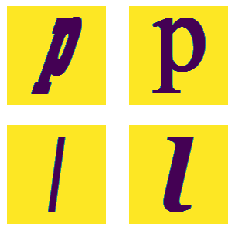

In [2]:
import numpy as np
from keras import layers
from keras import models
from random import randint
import math
import sys
import os

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

# path to directory
base_dir = "C:\\Users\\Cheikh\\Desktop\\projetChars74k"

fnt_base_dir = os.path.join(base_dir, "EnglishFnt")
img_base_dir = os.path.join(base_dir, "EnglishImg")
hnd_base_dir = os.path.join(base_dir, "EnglishHnd")

# utils functions used to plot random image in dataset


def showFolderImageSample(base_folder, img_number=2):
    '''
    base_folder(String) : directory in which we'll look for sample
    img_number : for each folder how many img to show
    '''
    nrows = ncols = img_number

    fig = plt.gcf()
    fig.set_size_inches(ncols * img_number, nrows * img_number)
    dir_names = os.listdir(base_folder)

    # get sample directory
    sample_dir = []
    for i in range(img_number):
        sample_dir.append(dir_names[randint(0, 61)])
    dir_names = [os.path.join(base_folder, dname) for dname in sample_dir]

    print("total sample directory : {}".format(len(dir_names)))
    # for each sample directory get img_number random image

    img = []
    for d in dir_names:
        for i in range(img_number):
            img.append(os.path.join(d, os.listdir(
                d)[randint(0, len(os.listdir(d)) - 1)]))

    for i, img_path in enumerate(img):
        # Set up subplot; subplot indices start at 1
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')  # Don't show axes (or gridlines)
        begin = time.time()
        img = mpimg.imread(img_path)
        end = time.time()
        print("Duration for reading 1 img: {}".format(end-begin))
        plt.imshow(img)

    plt.show()
    print("Size of one random image : {}".format(img.shape))
    print(" Example image : \n {}".format(img[0]))

########################################################################


def dirTotalFile(base):
    fileNumber = 0
    if(os.path.isfile(base)):
        return 0
    _dir = os.listdir(base)
    for d in _dir:
        _d = os.path.join(base, d)
        if(os.path.isdir(_d)):
            fileNumber += dirTotalFile(_d)
        else:
            fileNumber += 1
    return fileNumber


########################################################################

# showFolderImageSample(fnt_base_dir)


In [3]:
_list = [i for i in range(0, 10)] + [chr(i)
                                     for i in range(97, 123)] + [chr(i) for i in range(65, 91)]


class Utils:

    def __init__(self, path):
        self.path = path
        self.files = {}

    def readImage(self, start, size, _type):
        print('Reading {} dataset image....'.format(_type))
        begin = time.time()
        files = self.files
        data = []
        label = []
        j = 0
        for key in files.keys():
            label.append(key)
            for i in range(start, size+start):
                data.append(plt.imread(files[key][i]))
            j = j + 1.613
            if(j > 100):
                j = 100
            sys.stdout.write("\r{0:.2f}%".format(j))
            sys.stdout.flush()
        end = time.time()

        print(" \n Time for reading {} images : {}".format(_type, end-begin))
        return np.array(data), np.array(label)

    def loadData(self):
        train_images_size = 693
        validation_size = 82
        test_size = 241

        path = self.path
        files = self.files

        if(not(os.path.exists(path))):
            raise("Directory doesn't exist")

        dnames = [os.path.join(path, dname) for dname in os.listdir(path)]

        # read all the image
        for i, label in enumerate(_list):
            if(not(os.path.isdir(dnames[i]))):
                continue
            files[label] = [os.path.join(dnames[i], f)
                            for f in os.listdir(dnames[i])]
        train, train_label = self.readImage(0, train_images_size, "training")
        validation, validation_label = self.readImage(
            train_images_size, validation_size, "validation")
        test, test_label = self.readImage(
            train_images_size+validation_size, test_size, "test")
        return (train, train_label), (validation, validation_label), (test, test_label)


utils = Utils(fnt_base_dir)
(train, train_label), (validation,
                       validation_label), (test, test_label) = utils.loadData()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


NameError: name 'sys' is not defined

In [0]:
print(validation.shape)